First, edit the paths in the following cell to point to the correct locations on your system.

In [1]:
#AIA Error table - set path to location in your system.
errortab='/Users/jmdunca2/ssw/sdo/aia/response/aia_V3_error_table.txt'

#Sunpy data directory (or wherever else you store your downloaded AIA data)
sunpy_dir='/Users/jmdunca2/sunpy/data/'

#Path to top-level do-dem directory - edit for your system.
path_to_dodem = '/Users/jmdunca2/do-dem/'
from sys import path as sys_path
sys_path.append(path_to_dodem+'/dodem/')

#do-dem
import lightcurves as lc
import region_fitting as rf
import nustar_dem_prep as nu
import initial_analysis as ia
#import dodem

#Basics
import numpy as np
import importlib
import matplotlib.pyplot as plt
from astropy import units as u

#Time
import matplotlib.dates as mdates
import astropy.time
import datetime

#File wrangling
import glob
import pickle
import os
import pathlib



# from astropy.io import fits
# import nustar_pysolar as nustar
# import matplotlib.colors as colors
# from astropy.coordinates import SkyCoord
# from regions import CircleSkyRegion
import importlib
# import nustar_utilities as nuutil
import shutil


os.getcwd()

'/Users/jmdunca2/do-dem'

First, let's take a look at the NuSTAR lightcurves.

Using time limits:
[datetime.datetime(2024, 7, 17, 4, 39, tzinfo=datetime.timezone.utc), datetime.datetime(2024, 7, 17, 5, 41, tzinfo=datetime.timezone.utc)]


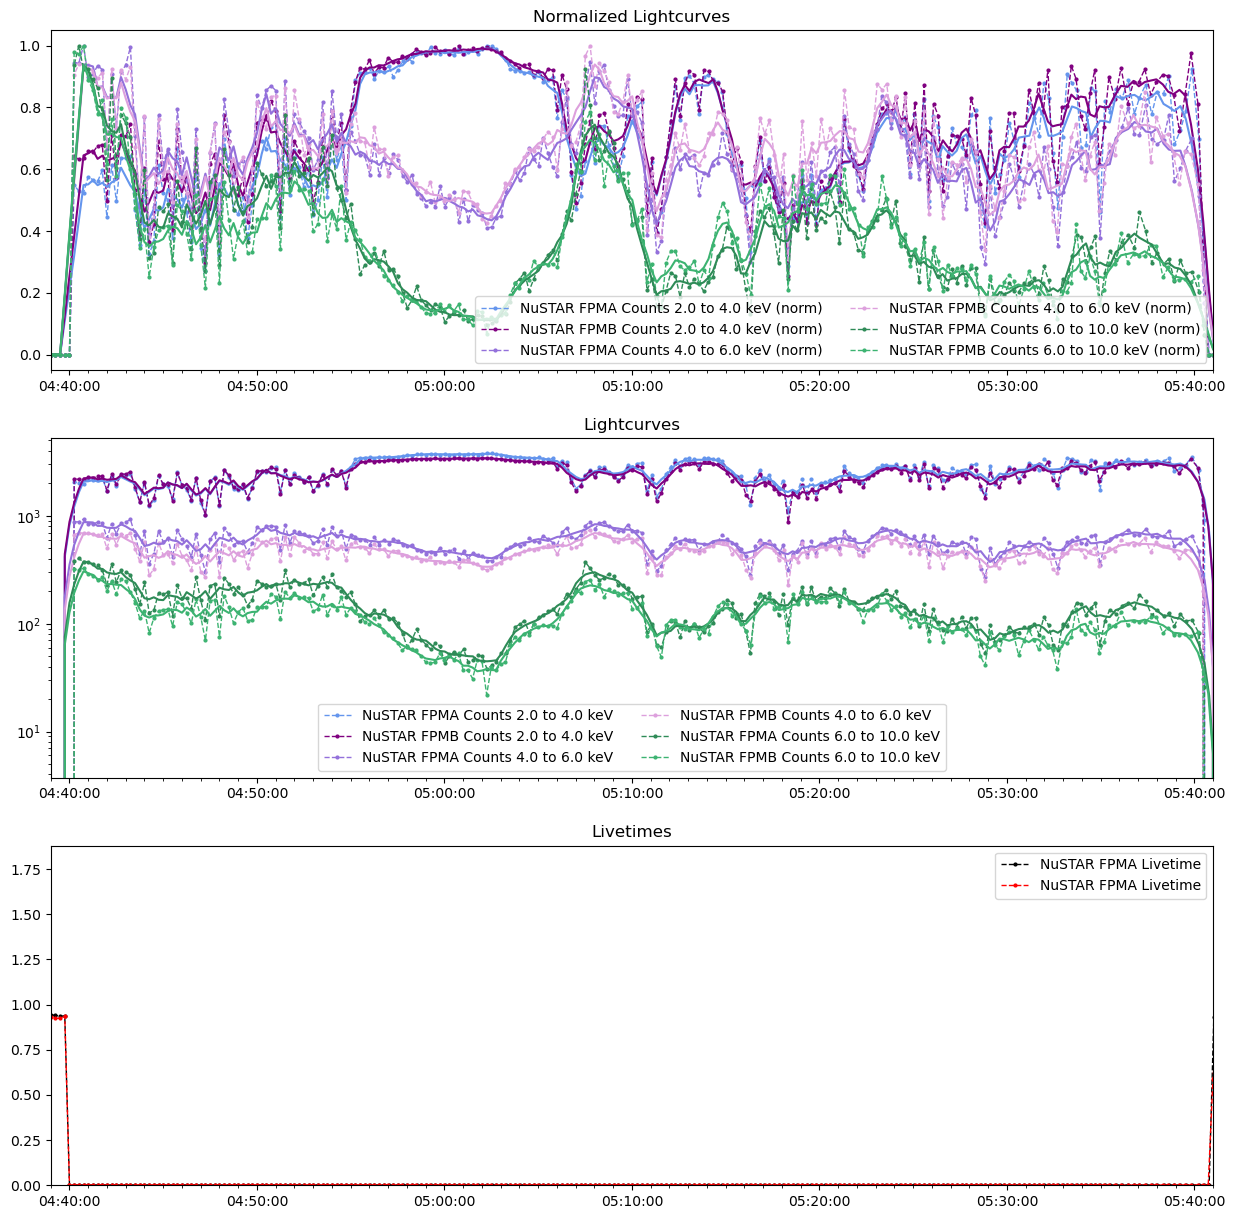

In [2]:
importlib.reload(lc)
#Name your working directory
working_dir='./initial_dem/'

#Make a new working directory for prepped data/etc if it doesn't yet exist
save_path = pathlib.Path(working_dir)
if not save_path.exists():
    save_path.mkdir()
    
#Set path to obsid directory - initial pipeline should have been run already.
datapath='/Users/jmdunca2/nustar/jul-2024/21012007001/'
obsid='21012007001'
#datapath='/Users/jmdunca2/nustar/jul-2021/90710201001/'
#obsid='90710201001'


#Comment second line if you're not using this same example nustar orbit
#Edit it to include only the desired time interval (default- all times in file) once you've run this once
timerange=[]
#timerange=[datetime.datetime(2024, 7, 16, 11, 2,0), datetime.datetime(2024, 7, 16, 12, 4)]
#timerange=[datetime.datetime(2024, 7, 16, 11, 4,0), datetime.datetime(2024, 7, 16, 11, 30)]
#timerange=[datetime.datetime(2024, 7, 16, 17, 26,0), datetime.datetime(2024, 7, 16, 18, 28)]
#timerange=[datetime.datetime(2024, 7, 16, 19, 3,0), datetime.datetime(2024, 7, 16, 20, 5)]
#timerange=[datetime.datetime(2024, 7, 17, 6, 15), datetime.datetime(2024, 7, 17, 7, 15)]
timerange=[datetime.datetime(2024, 7, 17, 4, 39), datetime.datetime(2024, 7, 17, 5, 41)]

from datetime import timezone
timerange = [t.replace(tzinfo=timezone.utc) for t in timerange]

evtA = glob.glob(datapath+'/event_cl/*A06_cl.evt')
evtB = glob.glob(datapath+'/event_cl/*B06_cl.evt')
hkA  = glob.glob(datapath+'/hk/*A_fpm.hk')
hkB  = glob.glob(datapath+'/hk/*B_fpm.hk')

importlib.reload(lc)
lc.prepare_nustar_lightcurves(evtA, evtB, hkA, hkB, timebin=15, erange=[2.,4.], 
                              livetime_corr=False, save_dir=working_dir)
lc.prepare_nustar_lightcurves(evtA, evtB, hkA, hkB, timebin=15, erange=[4.,6.], 
                              livetime_corr=False, save_dir=working_dir)
lc.prepare_nustar_lightcurves(evtA, evtB, hkA, hkB, timebin=15, erange=[6.,10.], 
                              livetime_corr=False, save_dir=working_dir)

lc.plot_nustar_lightcurves(eranges = [[2.,4.],[4.,6.],[6.,10.]],
                           timerange=timerange, save_dir=working_dir)

First, make time-interval and grade specific .evt files to use to pick your regions for generating spectral data products later. To make additional copies for different regions, re-run with different directory names (working_dir) – or just copy them over (nothing is region-specific yet). 

In [4]:
importlib.reload(nu)

working_dir='./jul-24-AR13743/'
#Make a new working directory for prepped data/etc if it doesn't yet exist
save_path = pathlib.Path(working_dir)
if not save_path.exists():
    save_path.mkdir()

#magixs2_interval = [astropy.time.Time('2024-07-16T19:03:30', scale='utc', format='isot'),
#                    astropy.time.Time('2024-07-16T19:10:00', scale='utc', format='isot')]
#time_interval=magixs2_interval
#time_interval = [astropy.time.Time('2024-07-17T06:16:00', scale='utc', format='isot'),
#                    astropy.time.Time('2024-07-17T06:32:00', scale='utc', format='isot')]
#time_interval = [astropy.time.Time('2024-07-17T04:40:00', scale='utc', format='isot'),
#                    astropy.time.Time('2024-07-17T05:41:00', scale='utc', format='isot')]
#time_interval = [astropy.time.Time('2024-07-16T19:03:00', scale='utc', format='isot'),
#                    astropy.time.Time('2024-07-16T20:03:00', scale='utc', format='isot')]
#time_interval= [astropy.time.Time('2024-07-16T11:03:00', scale='utc', format='isot'),
#                    astropy.time.Time('2024-07-16T12:03:00', scale='utc', format='isot')]
#time_interval= [astropy.time.Time('2024-07-16T17:27:00', scale='utc', format='isot'),
#                    astropy.time.Time('2024-07-16T17:48:00', scale='utc', format='isot')]

#Best data quality interval
time_interval = [astropy.time.Time('2024-07-17T04:55:00', scale='utc', format='isot'),
                    astropy.time.Time('2024-07-17T05:06:00', scale='utc', format='isot')]

#orbit 1 data interval
#time_interval= [astropy.time.Time('2024-07-16T11:04:00', scale='utc', format='isot'),
#                    astropy.time.Time('2024-07-16T11:30:00', scale='utc', format='isot')]

time = time_interval
timestring = time[0].strftime('%H-%M-%S')
stopstring = time[1].strftime('%H-%M-%S')
timestring=timestring+'_'+stopstring

# #not actually used since we aren't making spectral data products yet
regfile=path_to_dodem+'starter_region.reg'

gtifile=datapath+'event_cl/nu'+obsid+'A06_gti.fits'
nu.make_nustar_products(time_interval, 'A', gtifile, datapath, regfile, working_dir, edit_regfile=False,
                            pile_up_corr=True, clobber=True, path_to_dodem=path_to_dodem, dip_before_products=True)


gtifile=datapath+'event_cl/nu'+obsid+'B06_gti.fits'
nu.make_nustar_products(time_interval, 'B', gtifile, datapath, regfile, working_dir, edit_regfile=False,
                            pile_up_corr=True, clobber=True, path_to_dodem=path_to_dodem, dip_before_products=True)


ARF File:  ['./jul-24-AR13743/04-55-00_05-06-00/nu21012007001A06_0_p_sr.arf']
RMF File:  ['./jul-24-AR13743/04-55-00_05-06-00/nu21012007001A06_0_p_sr.rmf']
PHA File:  ['./jul-24-AR13743/04-55-00_05-06-00/nu21012007001A06_0_p_sr.pha']
ARF File:  ['./jul-24-AR13743/04-55-00_05-06-00/nu21012007001A06_0_4_p_sr.arf']
RMF File:  ['./jul-24-AR13743/04-55-00_05-06-00/nu21012007001A06_0_4_p_sr.rmf']
PHA File:  ['./jul-24-AR13743/04-55-00_05-06-00/nu21012007001A06_0_4_p_sr.pha']
ARF File:  ['./jul-24-AR13743/04-55-00_05-06-00/nu21012007001A06_21_24_p_sr.arf']
RMF File:  ['./jul-24-AR13743/04-55-00_05-06-00/nu21012007001A06_21_24_p_sr.rmf']
PHA File:  ['./jul-24-AR13743/04-55-00_05-06-00/nu21012007001A06_21_24_p_sr.pha']
dip_before_products is set True, so we will return after making only the time- and grade-specific evt files.
ARF File:  ['./jul-24-AR13743/04-55-00_05-06-00/nu21012007001B06_0_p_sr.arf']
RMF File:  ['./jul-24-AR13743/04-55-00_05-06-00/nu21012007001B06_0_p_sr.rmf']
PHA File:  ['./

In [4]:
# #Make a copy to do the other AR - if running for the first time
# working_dir2='./jul-24-AR13743/'
# shutil.copytree(working_dir+timestring, working_dir2+timestring)

Now, make images in each grade, and refine the desired regions.

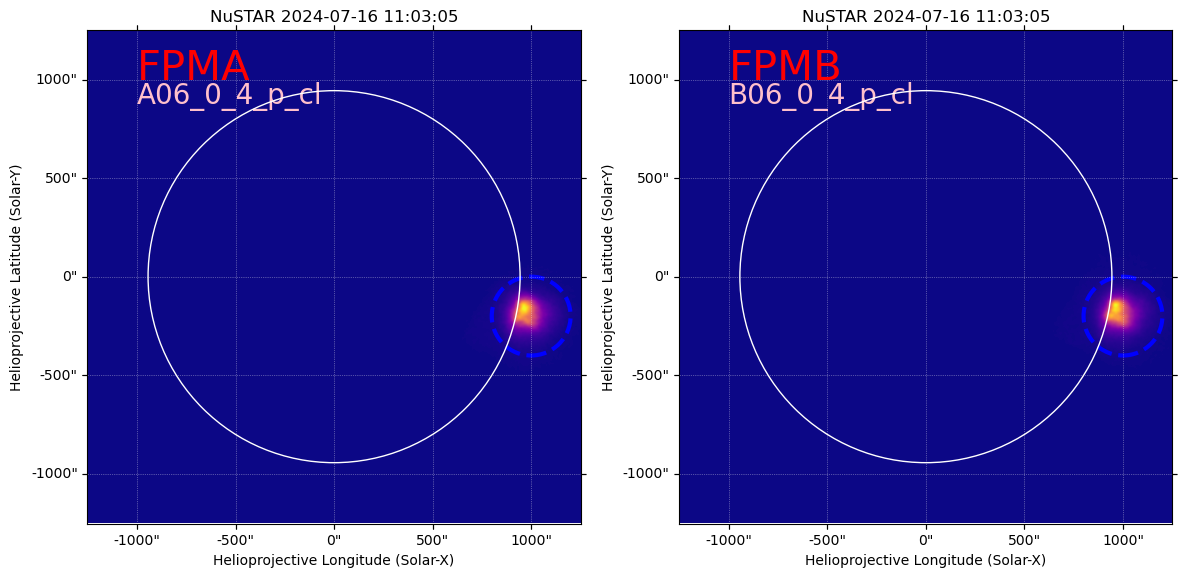

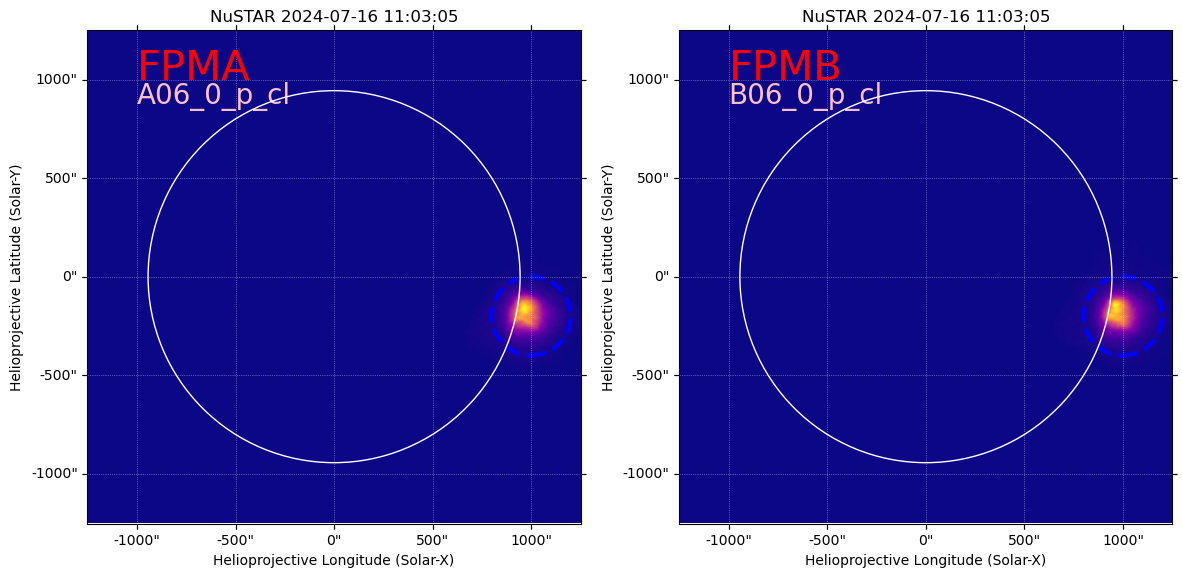

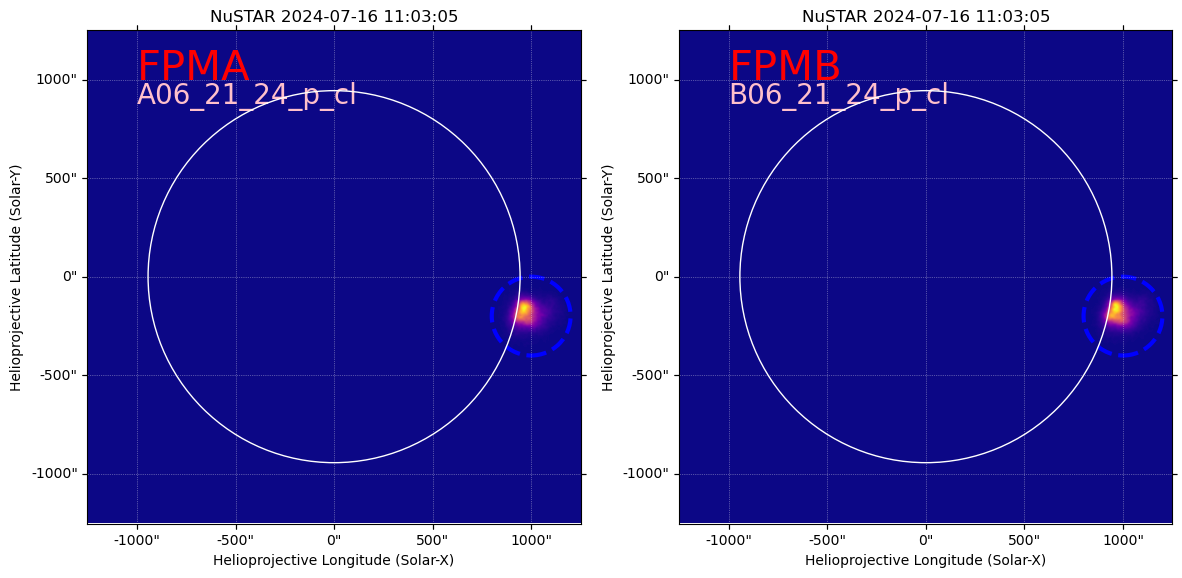

In [21]:
importlib.reload(ia)

#midtime=astropy.time.Time('2024-07-16T19:06:45', scale='utc', format='isot')

# working_dir='./jul-24-AR13743/'
# regionsavename='AR13743_'
# savefigdir=working_dir+timestring
# specific_time_evt = glob.glob(working_dir+timestring+'/'+'*cl.evt') #.sort()
# specific_time_evt.sort()
# #print(specific_time_evt)

# #orbit7
# regiondict = {'radius': 200,
#               'centerx': 500*u.arcsec,
#               'centery': -150*u.arcsec}


# ia.nuevtplot(datapath=datapath, evtA=specific_time_evt[0], evtB=specific_time_evt[3],
#           savefigdir=savefigdir,
#           regiondictA=regiondict, regiondictB=regiondict,
#          regionsave=True, regionsavename=regionsavename)    
# ia.nuevtplot(datapath=datapath, evtA=specific_time_evt[1], evtB=specific_time_evt[4],
#           savefigdir=savefigdir,
#           regiondictA=regiondict, regiondictB=regiondict,
#          regionsave=True, regionsavename=regionsavename) 
# ia.nuevtplot(datapath=datapath, evtA=specific_time_evt[2], evtB=specific_time_evt[5],
#           savefigdir=savefigdir,
#           regiondictA=regiondict, regiondictB=regiondict,
#          regionsave=True, regionsavename=regionsavename)



working_dir='./jul-24-AR13738/'
regionsavename='AR13738_'
savefigdir=working_dir+timestring
specific_time_evt = glob.glob(working_dir+timestring+'/'+'*cl.evt') #.sort()
specific_time_evt.sort()

#orbit1
regiondict = {'radius': 200,
             'centerx': 1000*u.arcsec,
             'centery': -200*u.arcsec}

#orbit7
# regiondict = {'radius': 200,
#               'centerx': 1000*u.arcsec,
#               'centery': -100*u.arcsec}


ia.nuevtplot(datapath=datapath, evtA=specific_time_evt[0], evtB=specific_time_evt[3],
          savefigdir=savefigdir,
          regiondictA=regiondict, regiondictB=regiondict,
         regionsave=True, regionsavename=regionsavename)    
ia.nuevtplot(datapath=datapath, evtA=specific_time_evt[1], evtB=specific_time_evt[4],
          savefigdir=savefigdir,
          regiondictA=regiondict, regiondictB=regiondict,
         regionsave=True, regionsavename=regionsavename) 
ia.nuevtplot(datapath=datapath, evtA=specific_time_evt[2], evtB=specific_time_evt[5],
          savefigdir=savefigdir,
          regiondictA=regiondict, regiondictB=regiondict,
         regionsave=True, regionsavename=regionsavename)

Once more for just grade 0, but with AIA94 context:

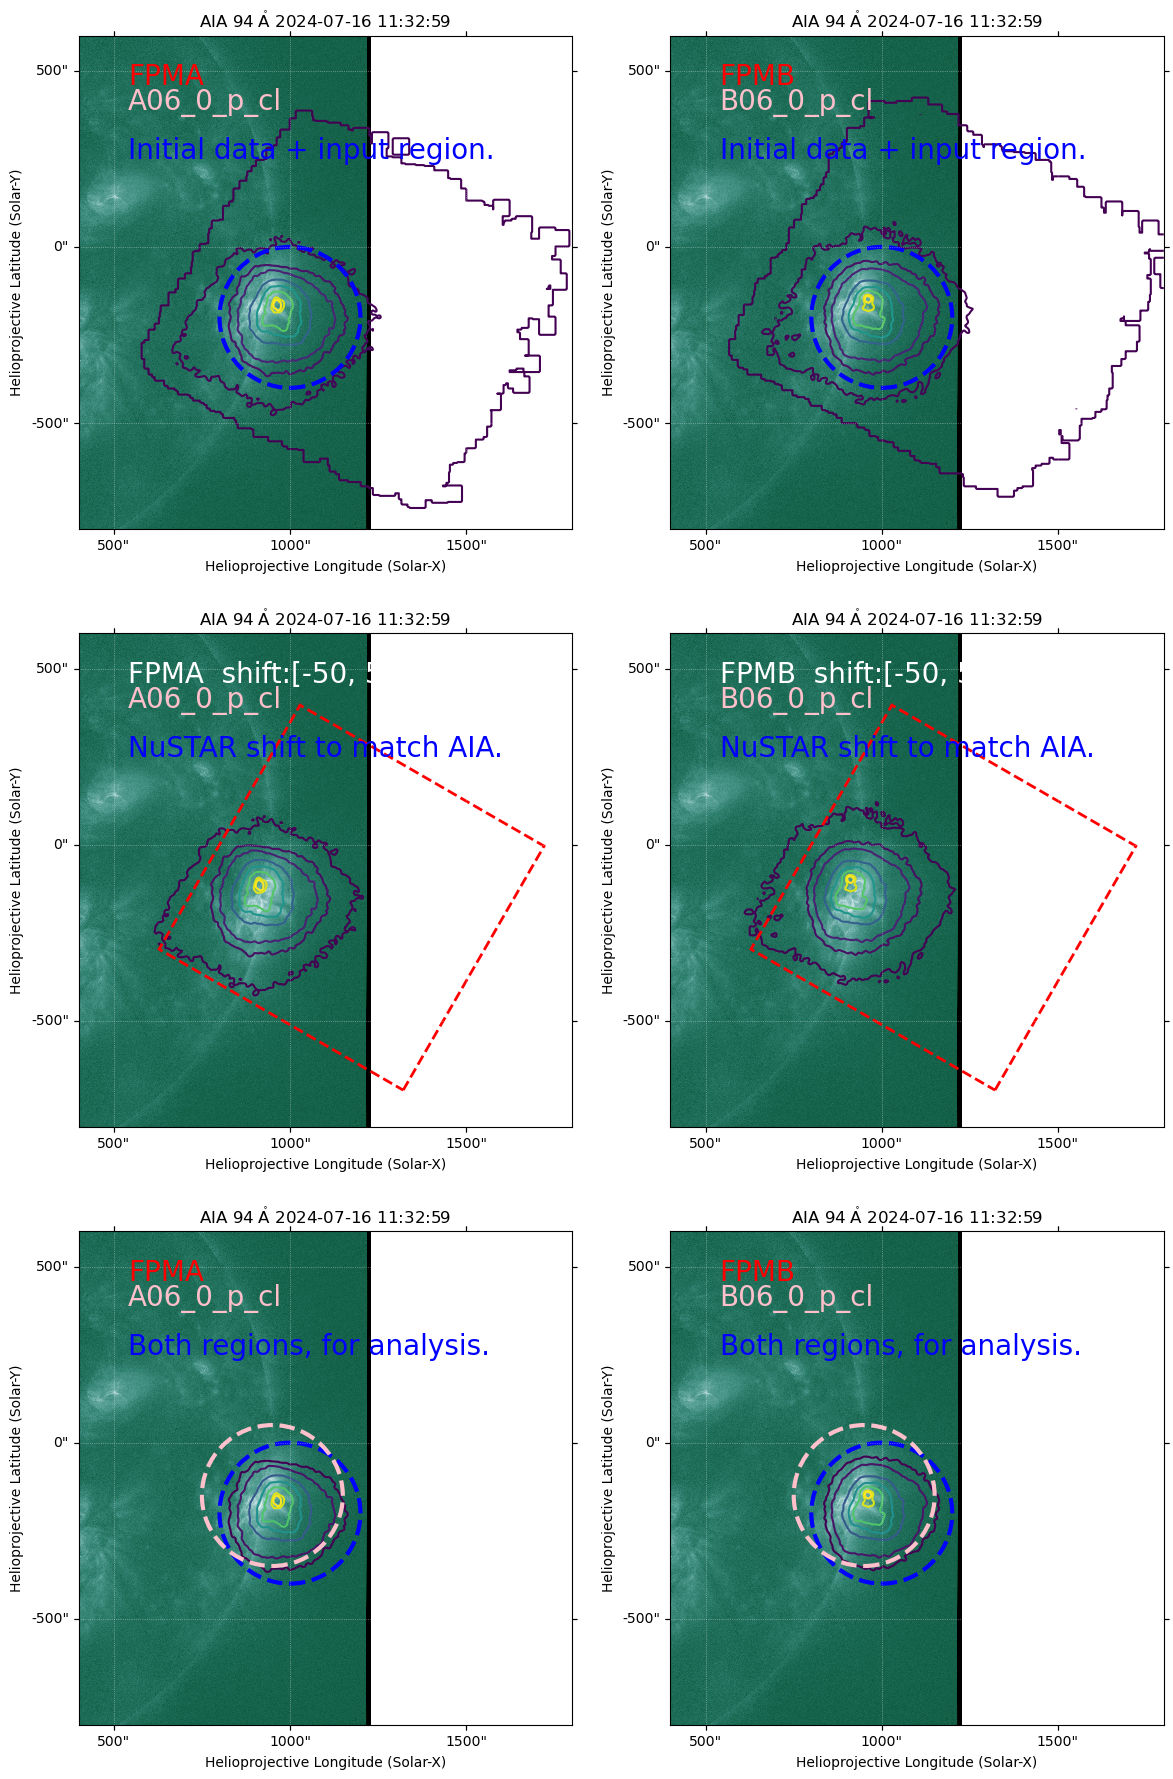

In [24]:
importlib.reload(ia)

nushift=[-50, 50]

#midtime=astropy.time.Time('2024-07-16T19:06:45', scale='utc', format='isot')

working_dir='./jul-24-AR13743/'
regionsavename='AR13743_'
savefigdir=working_dir+timestring
specific_time_evt = glob.glob(working_dir+timestring+'/'+'*cl.evt') #.sort()
specific_time_evt.sort()
#print(specific_time_evt)

#orbit7
#regiondict = {'radius': 200,
#              'centerx': 500*u.arcsec,
#              'centery': -150*u.arcsec}

#orbit6
regiondict = {'radius': 200,
              'centerx': 450*u.arcsec,
              'centery': -400*u.arcsec}
  
# m, nu_smap, aia_regiondict = ia.nuevtplot(datapath, evtA=specific_time_evt[1], evtB=specific_time_evt[4],
#           savefigdir=savefigdir, AIA94=True, input_aia=m,
#           regiondictA=regiondict, regiondictB=regiondict,
#          regionsave=True, regionsavename=regionsavename, 
#                          overlimb=True, nushift=[-50, 50]) 

# m2, nu_smap, aia_regiondict = ia.nuevtplot(datapath=datapath, evtA=specific_time_evt[1], evtB=specific_time_evt[4],
#           savefigdir=savefigdir, AIA94=True, #input_aia=m2, 
#           regiondictA=regiondict, regiondictB=regiondict,
#          regionsave=True, regionsavename=regionsavename, 
#                          overlimb=True, nushift=nushift) 

working_dir='./jul-24-AR13738/'
regionsavename='AR13738_'
savefigdir=working_dir+timestring
specific_time_evt = glob.glob(working_dir+timestring+'/'+'*cl.evt') #.sort()
specific_time_evt.sort()
#print(specific_time_evt)

#orbit1
regiondict = {'radius': 200,
             'centerx': 1000*u.arcsec,
             'centery': -200*u.arcsec}

#orbit7
#regiondict = {'radius': 200,
#              'centerx': 1000*u.arcsec,
#              'centery': -100*u.arcsec}

#orbit6
# regiondict = {'radius': 200,
#               'centerx': 900*u.arcsec,
#               'centery': -150*u.arcsec}

  
m2, nu_smap, aia_regiondict = ia.nuevtplot(datapath=datapath, evtA=specific_time_evt[1], evtB=specific_time_evt[4],
          savefigdir=savefigdir, AIA94=True, input_aia=m2, 
          regiondictA=regiondict, regiondictB=regiondict,
         regionsave=True, regionsavename=regionsavename, 
                         overlimb=True, nushift=nushift) 


(1000.0, 2500.0)

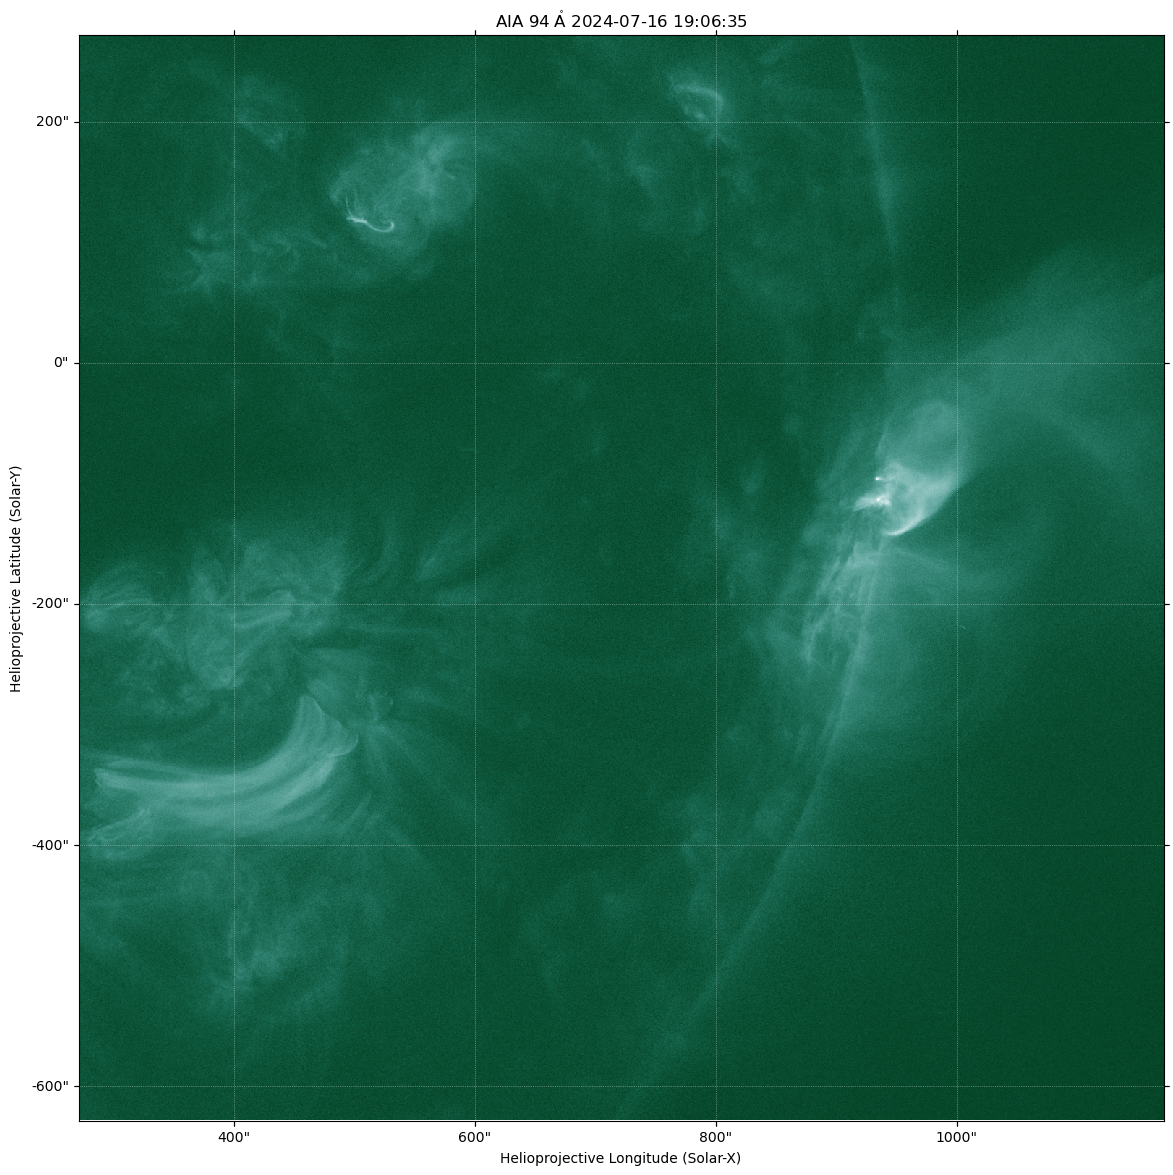

In [9]:
fig = plt.figure(figsize=(14,22))
ax = fig.add_subplot(111, projection=m2)
m2.plot()
ax.set_xlim([2500,4000])
ax.set_ylim([1000,2500])  

In [80]:
#saving maps to make example notebook for overplot
# filename='map_t'+m.date.strftime('%y-%m-%d_%H-%M-%S')+'_94A.fits'
# m.save(filename, overwrite='True')
# filename='nustar_map_t'+nu_smap.date.strftime('%y-%m-%d_%H-%M-%S')+'.fits'
# nu_smap.save(filename, overwrite='True')

 [astropy.io.fits.verify]


Now that we have region files for each of our desired regions, it's time to make spectral data products.

In [48]:
fpmz=['A','B']
working_dir='./jul-24-AR13738/'
regionsavename='AR13738_'

for fpm in fpmz:
    gtifile=datapath+'event_cl/nu'+obsid+fpm+'06_gti.fits'
    regfile=regionsavename+fpm+'.reg'
    nu.make_nustar_products(time_interval, fpm, gtifile, datapath, regfile, working_dir, edit_regfile=False,
                            pile_up_corr=True, clobber=False, path_to_dodem=path_to_dodem)

ARF File:  []
RMF File:  []
PHA File:  []
ARF File:  []
RMF File:  []
PHA File:  []
ARF File:  []
RMF File:  []
PHA File:  []
ARF File:  []
RMF File:  []
PHA File:  []
ARF File:  []
RMF File:  []
PHA File:  []
ARF File:  []
RMF File:  []
PHA File:  []


In [20]:
fpmz=['A','B']
working_dir='./jul-24-AR13743/'
regionsavename='AR13743_'

for fpm in fpmz:
    gtifile=datapath+'event_cl/nu'+obsid+fpm+'06_gti.fits'
    regfile=regionsavename+fpm+'.reg'
    nu.make_nustar_products(time_interval, fpm, gtifile, datapath, regfile, working_dir, edit_regfile=False,
                            pile_up_corr=True, clobber=False, path_to_dodem=path_to_dodem)

ARF File:  []
RMF File:  []
PHA File:  []
ARF File:  []
RMF File:  []
PHA File:  []
ARF File:  []
RMF File:  []
PHA File:  []
ARF File:  []
RMF File:  []
PHA File:  []
ARF File:  []
RMF File:  []
PHA File:  []
ARF File:  []
RMF File:  []
PHA File:  []


Now that we have spectral data products, it's time to make grade separated spectra:

In [49]:
importlib.reload(ia)

working_dir='./jul-24-AR13738/'
fpmz=['A','B']
for fpm in fpmz:
    nu.plot_grade_spectra(working_dir, timestring, fpm)

ARF File:  ['./jul-24-AR13738/11-04-00_11-30-00/nu21012001001A06_21_24_p_sr.arf']
RMF File:  ['./jul-24-AR13738/11-04-00_11-30-00/nu21012001001A06_21_24_p_sr.rmf']
PHA File:  ['./jul-24-AR13738/11-04-00_11-30-00/nu21012001001A06_21_24_p_sr.pha']
ARF File:  ['./jul-24-AR13738/11-04-00_11-30-00/nu21012001001A06_0_p_sr.arf']
RMF File:  ['./jul-24-AR13738/11-04-00_11-30-00/nu21012001001A06_0_p_sr.rmf']
PHA File:  ['./jul-24-AR13738/11-04-00_11-30-00/nu21012001001A06_0_p_sr.pha']
ARF File:  ['./jul-24-AR13738/11-04-00_11-30-00/nu21012001001A06_0_p_sr.arf']
RMF File:  ['./jul-24-AR13738/11-04-00_11-30-00/nu21012001001A06_0_p_sr.rmf']
PHA File:  ['./jul-24-AR13738/11-04-00_11-30-00/nu21012001001A06_0_p_sr.pha']
ARF File:  ['./jul-24-AR13738/11-04-00_11-30-00/nu21012001001B06_21_24_p_sr.arf']
RMF File:  ['./jul-24-AR13738/11-04-00_11-30-00/nu21012001001B06_21_24_p_sr.rmf']
PHA File:  ['./jul-24-AR13738/11-04-00_11-30-00/nu21012001001B06_21_24_p_sr.pha']
ARF File:  ['./jul-24-AR13738/11-04-00_1

In [24]:
working_dir='./jul-24-AR13743/'
fpmz=['A','B']
for fpm in fpmz:
    nu.plot_grade_spectra(working_dir, timestring, fpm)

ARF File:  ['./jul-24-AR13743/04-55-00_05-06-00/nu21012007001A06_21_24_p_sr.arf']
RMF File:  ['./jul-24-AR13743/04-55-00_05-06-00/nu21012007001A06_21_24_p_sr.rmf']
PHA File:  ['./jul-24-AR13743/04-55-00_05-06-00/nu21012007001A06_21_24_p_sr.pha']
ARF File:  ['./jul-24-AR13743/04-55-00_05-06-00/nu21012007001A06_0_p_sr.arf']
RMF File:  ['./jul-24-AR13743/04-55-00_05-06-00/nu21012007001A06_0_p_sr.rmf']
PHA File:  ['./jul-24-AR13743/04-55-00_05-06-00/nu21012007001A06_0_p_sr.pha']
ARF File:  ['./jul-24-AR13743/04-55-00_05-06-00/nu21012007001A06_0_p_sr.arf']
RMF File:  ['./jul-24-AR13743/04-55-00_05-06-00/nu21012007001A06_0_p_sr.rmf']
PHA File:  ['./jul-24-AR13743/04-55-00_05-06-00/nu21012007001A06_0_p_sr.pha']
ARF File:  ['./jul-24-AR13743/04-55-00_05-06-00/nu21012007001B06_21_24_p_sr.arf']
RMF File:  ['./jul-24-AR13743/04-55-00_05-06-00/nu21012007001B06_21_24_p_sr.rmf']
PHA File:  ['./jul-24-AR13743/04-55-00_05-06-00/nu21012007001B06_21_24_p_sr.pha']
ARF File:  ['./jul-24-AR13743/04-55-00_0